### 5시간동안 시행착오 겪은 내용정리 
1. array를 정리할땐 np.append를 쓰자.

2. array가 중요하다. shape도 생각하고 shape를 어떻게 다뤄야할지도 계속 연습해야한다.
3. gradient descent는 theta를 구하기 위한 식일 뿐이다. gradient 식을 가지고 gradient descent plot을 그릴 순 없다. 
4. gradient descent를 그리기 위해서는 먼저 최적의 Weight을 찾아야한다. 그 다음 mse를 계산하는 해서 plot을 만든다.
5. contour plot에서 z는 x*y 크기의 행렬이어야 한다. 격자별로 mse를 올려놓고 비슷한 부분을 등고선으로 연결시키는 개념이다.

### 배운 매소드
* array.size : vector 개수를 알려줌  axb= size

* array.flatten  : 행렬을 그냥 하나의 array로 만듬(scalar로 만드는건가? 방향이 없으니까)
* np.append(쌓일 array, 쌓을 array, 쌓을 위치(axis=0 row, axis-1 column))
* min(list) : list 최솟값 구하기
* list.index(조건) => 위치 반환
* array는 slice를 사용하면 원하는데로 조절하기 편함



In [1]:
### 등고선으로 gradient descent 그려보기

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
loans_df = pd.read_csv('D:\git_local_repository\yangoos57\DA\data/loans.csv')

# total_credit_limit
# total_credit_utilized

### ch9에서 활용하는 column만 추출
intro_data = loans_df[['interest_rate','verified_income','debt_to_income', 'total_credit_limit', 'total_credit_utilized', 'public_record_bankrupt','term','issue_month','inquiries_last_12m']]

# credit_util 항목 만들기
intro_data['credit_util'] = np.round(intro_data['total_credit_utilized']/intro_data['total_credit_limit'],2)

### 이름변경
intro_data.columns = ['interest_rate', 'income_ver', 'debt_to_income', '1','2', 'bankruptcy', 'term', 'issued','credit_checks','credit_util']

# loans_df.loc[1]
intro_data.drop(columns=['1','2'],inplace=True)


intro_data.dropna(inplace=True) # 결측값 있는 row 제거
intro_data.reset_index(drop=True,inplace=True) # index 


<ipython-input-560-917e98e50449>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_data['credit_util'] = np.round(intro_data['total_credit_utilized']/intro_data['total_credit_limit'],2)
<ipython-input-560-917e98e50449>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_data.drop(columns=['1','2'],inplace=True)
<ipython-input-560-917e98e50449>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [573]:
from sklearn.preprocessing import StandardScaler
x_b = intro_data[['term','credit_util']]
y = intro_data[['interest_rate']]
scaler = StandardScaler()
x_b = pd.DataFrame(scaler.fit_transform(x_b))

In [574]:

theta = np.random.randn(2,1)  # random initialization

eta = 0.1  # learning rate
n_iterations = 1000
m = 9974

theta_np =np.empty((1,2))
mse_list =[]
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta).values - y.values)
    theta = theta - eta * gradients
    theta_np = np.append(theta_np, theta.values.T,axis=0,)
    mse = (1/m)*np.sum(np.square(x_b.dot(theta).values - y.values))
    mse_list.append(mse)

num = mse_list.index(min(mse_list))

print(f'최적 w : {theta_np[1:][num]}')



최적 w : [1.84409892 1.34452632]


In [579]:
n_r = 3 # number of range
x_lin = np.linspace(-theta_np[1:][num][0]*n_r ,theta_np[1:][num][0]*n_r, 200) # plot을 그리기 위해 최적 w를 기준으로 범위를 넓히자
y_lin = np.linspace(-theta_np[1:][num][1]*n_r ,theta_np[1:][num][1]*n_r, 200) # plot을 그리기 위해 최적 w를 기준으로 범위를 넓히자
z_lin = np.zeros((x_lin.size,y_lin.size)) # 100*100 격자 만들기

for i, value1 in enumerate(x_lin):
    for j, value2 in enumerate(y_lin):
        w_temp = np.array((value1,value2)).reshape(2,1)        
        z_lin[i, j] = (1/m)*np.sum(np.square(x_b.dot(w_temp).values - y.values)) ## 격자에 맞는 MSE 채우기

Text(0, 0.5, 'w1')

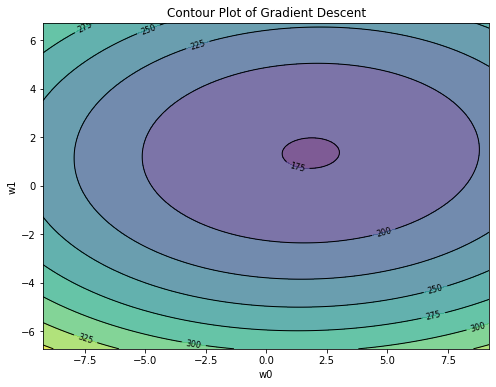

In [591]:
# plt.contourf(x_lin,y_lin,z_lin)
plt.figure(figsize=(8,6))
plt.contourf(x_lin,y_lin,z_lin,alpha=0.7) # 색만 칠하기
CS = plt.contour(x_lin,y_lin,z_lin,linewidths=1,colors='black') # 등고선만 그리기
plt.clabel(CS, inline=1, fontsize=8,fmt='%d') # 등고선에 text 넣기
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")

